In [117]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
#from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load and read data files
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_trial = pd.read_csv(clinical_trial_data_to_load)

# Limit data to only these treatments: Capomulin, Infubinol, Ketapril, and Placebo
df_mouse = df_mouse.drop(df_mouse[(df_mouse.Drug == 'Stelasyn') | 
                                  (df_mouse.Drug == 'Naftisol')| 
                                  (df_mouse.Drug == 'Ceftamin')| 
                                  (df_mouse.Drug == 'Propriva') | 
                                  (df_mouse.Drug == 'Zoniferol')| 
                                  (df_mouse.Drug == 'Ramicane')].index)

# Combine the data into a single dataset
df = df_mouse.merge(df_trial,on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,q119,Ketapril,0,45.000000,0
1,q119,Ketapril,5,47.864440,0
2,q119,Ketapril,10,51.236606,0
3,n923,Ketapril,0,45.000000,0
4,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [118]:
# Get the mean tumor volume data grouped by drug and timepoint 
drug_time_group = df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
df_tumor_volume = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].mean())

# Preview DataFrame
df_tumor_volume.head()

# **** need the following? also same as the table
#mean_tum_vol2 = df_tumor_vol_mean.iloc[:,0]
#print(mean_tum_vol2)

# *** To match their table, do the following? 
# grouped = df.groupby(['Drug','Timepoint'])
# test = pd.DataFrame(grouped['Tumor Volume (mm3)'].mean())
# test_data = test.loc[df['Drug'].unique()[0]]
# for i in df['Drug'].unique():
#     data = test.loc[i]
#     test_data[i]=data
# del test_data['Tumor Volume (mm3)']    
# test_data.head(2)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [119]:
# Add standard error of tumor volumes to dataframe
df_tumor_volume['Tumor Vol Sem'] = drug_time_group['Tumor Volume (mm3)'].sem()

# Preview DataFrame
df_tumor_volume.head()

# **** need the following? same as table
#sem_tum_vol = drug_time_group['Tumor Volume (mm3)'].sem()

# *** dont need - added column to table above
# Convert to DataFrame
#df_tumor_vol_sem = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].sem())
#display(df_tumor_vol_mean.head())
#display(df_tumor_vol_mean.loc['Capomulin'].reset_index())


Tumor Volume (mm3)  Tumor Vol Sem
Drug      Timepoint                                   
Capomulin 0                   45.000000       0.000000
          5                   44.266086       0.448593
          10                  43.084291       0.702684
          15                  42.064317       0.838617
          20                  40.716325       0.909731

<Figure size 540x360 with 0 Axes>

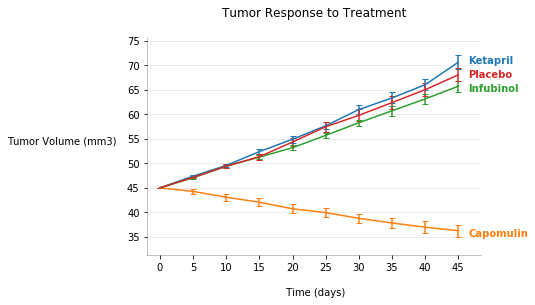

In [120]:
# Generate the plot with error bars
# Loop preparation
plt.figure(figsize=(7.5,5))
fig, ax = plt.subplots()
 
# Loop through the dataframe to get the values for the chart
for drug in df['Drug'].unique():
    drug_data = df_tumor_volume.loc[drug].reset_index()
    x_axis = drug_data.loc[:,'Timepoint'].values 
    y_axis = drug_data.loc[:,'Tumor Volume (mm3)'].values 
    std_err = drug_data.loc[:,'Tumor Vol Sem'].values 
    ax.errorbar(x_axis,y_axis,yerr=std_err,capsize=3, elinewidth=0, markeredgewidth=1,label=drug)

# Set chart design basics
plt.title('Tumor Response to Treatment\n',weight='medium')
plt.xlabel('\n Time (days)')
plt.ylabel('Tumor Volume (mm3)  ',rotation=0,ha='right')
plt.xlim(min(x_axis)-2,max(x_axis)+3.5)
plt.ylim(min(df_tumor_volume['Tumor Volume (mm3)'])-5,max(df_tumor_volume['Tumor Volume (mm3)'])+5)
plt.grid(axis='y',alpha=.3)

#If I wanted to do a traditional legend:
    #plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False)
        #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# But I want to annotate here for clearer viz
# **** way to automate color based on presets?
plt.xticks(np.arange(min(df['Timepoint']), max(df['Timepoint']+2), 5.0))
plt.annotate('Ketapril',(46.5,70.3),ha='left',color='C0',weight='bold')
plt.annotate('Capomulin',(46.5,35),ha='left',color='C1',weight='bold')
plt.annotate('Infubinol',(46.5,64.7),ha='left',color='C2',weight='bold')
plt.annotate('Placebo',(46.5,67.5),ha='left',color='C3',weight='bold')

# Address remaining clutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

# Save the figure in a way that perserves special formatting
plt.savefig('Tumor_Vol.jpg',bbox_inches = "tight")
 
# Show the Figure
plt.show()

# If time permits:
    # How pre-set color order 
        #ax.set_color_cycle(['blue', 'red', 'green','cyan'])

## Metastatic Response to Treatment

In [121]:
# Get the mean tumor volume data grouped by drug and timepoint 
df_met_mean = pd.DataFrame(drug_time_group['Metastatic Sites'].mean())

# Get the standard error associated with met. sites grouped by drug and timepoint 
df_met_mean['Metastatic Sem'] = drug_time_group['Metastatic Sites'].sem()

# Preview DataFrame
df_met_mean.head()

Metastatic Sites  Metastatic Sem
Drug      Timepoint                                  
Capomulin 0                  0.000000        0.000000
          5                  0.160000        0.074833
          10                 0.320000        0.125433
          15                 0.375000        0.132048
          20                 0.652174        0.161621

<Figure size 540x360 with 0 Axes>

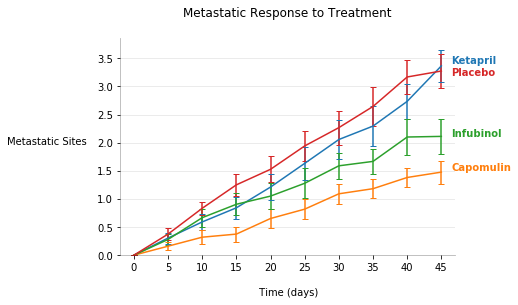

In [122]:
# Generate the plot with error bars
# Loop preparation
plt.figure(figsize=(7.5,5))
fig, ax = plt.subplots()
 
# Loop through the dataframe to get the values for the chart
for drug in df['Drug'].unique():
    drug_data = df_met_mean.loc[drug].reset_index()
    x_axis = drug_data.loc[:,'Timepoint'].values 
    y_axis = drug_data.loc[:,'Metastatic Sites'].values 
    std_err = drug_data.loc[:,'Metastatic Sem'].values 
    ax.errorbar(x_axis,y_axis,yerr=std_err,capsize=3, elinewidth=0, markeredgewidth=1,label=drug)

# Set chart design basics
plt.title('Metastatic Response to Treatment\n',weight='medium')
plt.xlabel('\n Time (days)')
plt.ylabel('Metastatic Sites  ',rotation=0,ha='right')
plt.xlim(min(x_axis)-2,max(x_axis)+2)
plt.ylim(min(df_met_mean['Metastatic Sites']),max(df_met_mean['Metastatic Sites']+.5))
plt.grid(axis='y',alpha=.3)

#If I wanted to do a traditional legend:
#plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False)
        #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# But I want to annotate here for clearer viz
# **** way to automate color based on presets?
plt.xticks(np.arange(min(df['Timepoint']), max(df['Timepoint']+2), 5.0))
plt.annotate('Ketapril',(46.5,3.4),ha='left',color='C0',weight='bold')
plt.annotate('Capomulin',(46.5,1.5),ha='left',color='C1',weight='bold')
plt.annotate('Infubinol',(46.5,2.1),ha='left',color='C2',weight='bold')
plt.annotate('Placebo',(46.5,3.2),ha='left',color='C3',weight='bold')

# Address remaining clutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

# Save the figure in a way that perserves special formatting
plt.savefig('Metastatic_Sites.jpg',bbox_inches = "tight")
 
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [127]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Get the mean tumor volume data grouped by drug and timepoint 
df_mice_num = pd.DataFrame(drug_time_group['Mouse ID'].nunique())
df_mice_num['Survival Rate']=(df_mice_num['Mouse ID']/25*100)#.map('{:,.2f}'.format) #,'{:,.2f}'.format})
#df['cost'] = df['cost'].map('${:,.2f}'.format)
# df.mice_num.format['Survival Rate']=df_mice_num({'Survival Rate': '{:,.2f}'.format})

# Preview DataFrame
df_mice_num.head()

Mouse ID  Survival Rate
Drug      Timepoint                         
Capomulin 0                25          100.0
          5                25          100.0
          10               25          100.0
          15               24           96.0
          20               23           92.0

<Figure size 540x360 with 0 Axes>

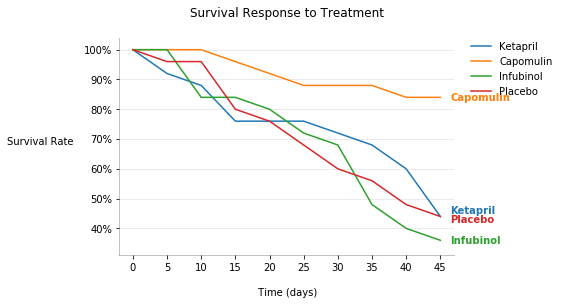

In [143]:
# Generate the Plot (Accounting for percentages)

# Generate the plot with error bars
# Loop preparation
plt.figure(figsize=(7.5,5))
fig, ax = plt.subplots()
 
# Loop through the dataframe to get the values for the chart
for drug in df['Drug'].unique():
    drug_data = df_mice_num.loc[drug].reset_index()
    x_axis = drug_data.loc[:,'Timepoint'].values 
    y_axis = drug_data.loc[:,'Survival Rate'].values 
    ax.errorbar(x_axis,y_axis,capsize=3, elinewidth=0, markeredgewidth=1,label=drug)

# Set chart design basics
plt.title('Survival Response to Treatment\n',weight='medium')
plt.xlabel('\n Time (days)')
plt.ylabel('Survival Rate  ',rotation=0,ha='right')
plt.xlim(min(x_axis)-2,max(x_axis)+2)
plt.ylim(min(df_mice_num['Survival Rate']-5),max(df_mice_num['Survival Rate']+4))
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.grid(axis='y',alpha=.3)

#If I wanted to do a traditional legend:
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False)
        #https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# But I want to annotate here for clearer viz
# **** way to automate color based on presets?
plt.xticks(np.arange(min(df['Timepoint']), max(df['Timepoint']+2), 5.0))
plt.annotate('Ketapril',(46.5,45),ha='left',color='C0',weight='bold')
plt.annotate('Capomulin',(46.5,83),ha='left',color='C1',weight='bold')
plt.annotate('Infubinol',(46.5,35),ha='left',color='C2',weight='bold')
plt.annotate('Placebo',(46.5,42),ha='left',color='C3',weight='bold')

# Address remaining clutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

# Save the figure in a way that perserves special formatting
plt.savefig('Survival_Rate.jpg',bbox_inches = "tight")
 
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)